## Evaluation of the datasets with CICFlowmeter

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir=root_dir+'proyecto_grado_redes/evaluation_datasets/'

Mounted at /content/gdrive


In [2]:
import pandas as pd

## Reading the dataset

In [3]:
df_trabid_normal_org=pd.read_csv(base_dir+"csv_original/trabid_ddos_probe_known_services_pcap_Flow.csv")
df_trabid_normal_org['Label'] = df_trabid_normal_org['Label'].map({'NeedManualLabel': 'Normal'})
df_trabid_normal_org.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.0.16-192.168.0.200-38079-80-6,192.168.0.16,38079,192.168.0.200,80,6,02/12/2014 10:14:59 AM,42871,176,282,121.0,142040.0,121.0,0.0,0.687500,9.120718,512.0,0.0,503.687943,63.040080,3.316018e+06,10683.212428,93.809628,181.372439,3170.0,1.0,42338.0,241.931429,380.259721,4091.0,2.0,41809.0,148.786477,249.268911,3170.0,6.0,0,0,0,0,...,0.0,512.0,309.718954,250.088320,62544.167566,2,2,0,1,457,0,0,0,1.0,310.395197,0.687500,503.687943,0,0,0,142161,279,3664037,0,0,0,0,14600,16430,1,32,0,0,0,0,0.0,0.0,0.0,0.0,Normal
1,192.168.0.20-192.168.0.200-43949-80-6,192.168.0.20,43949,192.168.0.200,80,6,02/12/2014 10:15:00 AM,64192,285,466,121.0,236074.0,121.0,0.0,0.424561,7.167421,512.0,0.0,506.596567,51.969183,3.679508e+06,11699.277168,85.589333,121.050263,1364.0,1.0,63672.0,224.197183,276.862960,2333.0,1.0,63522.0,136.606452,182.044880,1723.0,3.0,0,0,0,0,...,0.0,512.0,314.089096,249.309339,62155.146512,2,2,0,1,750,0,0,0,1.0,314.507324,0.424561,506.596567,0,0,0,236195,463,3902823,0,0,0,0,14600,16430,1,32,0,0,0,0,0.0,0.0,0.0,0.0,Normal
2,192.168.0.20-192.168.0.200-58592-80-6,192.168.0.20,58592,192.168.0.200,80,6,02/12/2014 10:15:00 AM,8186,47,52,121.0,23062.0,121.0,0.0,2.574468,17.649664,512.0,0.0,443.500000,161.635210,2.832030e+06,12093.818715,83.530612,179.197075,1277.0,1.0,7718.0,167.782609,333.312327,1951.0,1.0,8122.0,159.254902,274.155492,1277.0,3.0,0,0,0,0,...,0.0,512.0,231.830000,250.263419,62631.778889,2,2,0,1,98,0,0,0,1.0,234.171717,2.574468,443.500000,0,0,0,23183,49,4017850,0,0,0,0,14600,16430,1,32,0,0,0,0,0.0,0.0,0.0,0.0,Normal
3,192.168.0.20-192.168.0.200-46774-80-6,192.168.0.20,46774,192.168.0.200,80,6,02/12/2014 10:15:00 AM,8530,49,56,121.0,25178.0,121.0,0.0,2.469388,17.285714,512.0,0.0,449.607143,153.528402,2.965885e+06,12309.495897,82.019231,183.520639,1384.0,1.0,8043.0,167.562500,346.744428,2096.0,1.0,8501.0,154.563636,267.331793,1384.0,3.0,0,0,0,0,...,0.0,512.0,238.669811,250.583043,62791.861366,2,2,0,1,104,0,0,0,1.0,240.942857,2.469388,449.607143,0,0,0,25299,53,3925977,0,0,0,0,14600,16430,1,32,0,0,0,0,0.0,0.0,0.0,0.0,Normal
4,192.168.0.23-192.168.0.200-34240-80-6,192.168.0.23,34240,192.168.0.200,80,6,02/12/2014 10:15:01 AM,16068,64,84,121.0,40799.0,121.0,0.0,1.890625,15.125000,512.0,0.0,485.702381,110.660969,2.546677e+06,9210.853871,109.306122,188.688466,1497.0,3.0,15366.0,243.904762,410.845262,2476.0,3.0,14670.0,176.746988,247.321349,1524.0,66.0,0,0,0,0,...,0.0,512.0,274.630872,254.809451,64927.856067,2,2,0,1,147,0,0,0,1.0,276.486486,1.890625,485.702381,0,0,0,40920,81,3475749,0,0,0,0,14600,16430,1,32,0,0,0,0,0.0,0.0,0.0,0.0,Normal


In [4]:
df_trabid_normal_org.shape

(113517, 84)

In [5]:
df_trabid_attack_org=pd.read_csv(base_dir+"csv_original/trabid_ddos_probe_known_attacks_pcap_Flow.csv")
df_trabid_attack_org['Label'] = df_trabid_attack_org['Label'].map({'NeedManualLabel': 'Attack'})
df_trabid_attack_org.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.0.20-192.168.0.200-52997-80-6,192.168.0.20,52997,192.168.0.200,80,6,01/12/2014 07:07:08 AM,9168,7,6,121.0,295.0,121.0,0.0,17.285714,45.733701,295.0,0.0,49.166667,120.433246,4.537522e+04,1417.975567,764.000000,807.020446,2949.0,65.0,7337.0,1222.833333,1445.940720,3916.0,65.0,7659.0,1531.800000,1123.678424,2949.0,492.0,0,0,0,0,...,0.0,295.0,29.714286,82.883077,6869.604396,2,4,0,1,11,0,0,0,0.0,32.000000,17.285714,49.166667,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
1,192.168.0.20-192.168.0.200-53661-80-6,192.168.0.20,53661,192.168.0.200,80,6,01/12/2014 07:07:08 AM,18860,5,5,121.0,295.0,121.0,0.0,24.200000,54.112845,295.0,0.0,59.000000,131.928011,2.205726e+04,530.222694,2095.555556,2536.856623,8176.0,12.0,13078.0,3269.500000,4237.505988,9306.0,12.0,16606.0,4151.500000,2889.136492,8176.0,1304.0,0,0,0,0,...,0.0,295.0,37.818182,92.700397,8593.363636,2,2,0,1,9,0,0,0,1.0,41.600000,24.200000,59.000000,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
2,192.168.0.23-192.168.0.200-38043-80-6,192.168.0.23,38043,192.168.0.200,80,6,01/12/2014 07:07:08 AM,62630,140,226,121.0,113523.0,121.0,0.0,0.864286,10.226366,512.0,0.0,502.314159,68.223642,1.814530e+06,5843.844803,171.589041,498.654239,7106.0,2.0,62037.0,446.309353,1081.057137,10171.0,2.0,61812.0,274.720000,705.493632,7106.0,6.0,0,0,0,0,...,0.0,512.0,309.656676,250.111903,62555.963774,2,2,0,1,365,0,0,0,1.0,310.502732,0.864286,502.314159,0,0,0,113644,223,1931965,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
3,192.168.0.16-192.168.0.200-35652-80-6,192.168.0.16,35652,192.168.0.200,80,6,01/12/2014 07:07:08 AM,95761,314,488,120.0,246815.0,120.0,0.0,0.382166,6.771992,512.0,0.0,505.768443,55.924759,2.578659e+06,8375.016969,119.551810,349.503630,7288.0,1.0,95325.0,304.552716,663.559562,8599.0,1.0,94700.0,194.455852,508.863890,7288.0,5.0,0,0,0,0,...,0.0,512.0,307.515567,250.765443,62883.307426,2,4,0,1,800,0,0,0,1.0,307.899002,0.382166,505.768443,0,0,0,246935,484,2685185,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
4,192.168.0.17-192.168.0.200-33480-80-6,192.168.0.17,33480,192.168.0.200,80,6,01/12/2014 07:07:09 AM,7065,5,5,121.0,380.0,121.0,0.0,24.200000,54.112845,380.0,0.0,76.000000,169.941166,7.091295e+04,1415.428167,785.000000,493.860810,1659.0,95.0,5994.0,1498.500000,1225.331928,2909.0,95.0,5673.0,1418.250000,651.922477,2186.0,670.0,0,0,0,0,...,0.0,380.0,45.545455,116.714492,13622.272727,2,2,0,1,9,0,0,0,1.0,50.100000,24.200000,76.000000,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack


In [6]:
df_trabid_attack_org.shape

(150667, 84)

In [7]:
df_trabid_normal_srg=pd.read_csv(base_dir+"csv_modified/trabid_ddos_probe_known_services_pcap_Flow.csv")
df_trabid_normal_srg['Label'] = df_trabid_normal_srg['Label'].map({'ManualLabel': 'Normal'})
df_trabid_normal_srg.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Flow Packets Count,Flow Bytes Count,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Fwd Packet Length Rel Std,Fwd Packet Length Median,Fwd Packet Length IQR,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Rel Std,Bwd Packet Length Median,Bwd Packet Length IQR,Flow Bytes/s,Flow Packets/s,Flow Avg Bytes/Packets,Fwd Avg Bytes/Packets,Bwd Avg Bytes/Packets,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Flow IAT Rel Std,Flow IAT Median,Flow IAT IQR,...,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Rel Std,Active Median,Active IQR,Active Max,Active Min,Idle Mean,Idle Std,Idle Rel Std,Idle Median,Idle IQR,Idle Max,Idle Min,Label
0,192.168.0.16-192.168.0.200-38079-80-6,192.168.0.16,38079,192.168.0.200,80,6,02/12/2014 10:14:59 AM,42871,458,142161,176,282,121.0,142040.0,121.0,0.0,0.687500,9.120718,13.266499,0.0,0.0,512.0,0.0,503.687943,63.040080,0.125157,512.0,0.0,3.316018e+06,10683.212428,310.395197,0.687500,503.687943,93.809628,181.372439,3170.0,1.0,1.933410,56.0,65.0,...,2,0,1,457,0,0,0,1.0,310.395197,0.687500,503.687943,0,0,0,142161,279,3664037,0,0,0,0,14600,16430,1,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,192.168.0.20-192.168.0.200-43949-80-6,192.168.0.20,43949,192.168.0.200,80,6,02/12/2014 10:15:00 AM,64192,751,236195,285,466,121.0,236074.0,121.0,0.0,0.424561,7.167421,16.881943,0.0,0.0,512.0,0.0,506.596567,51.969183,0.102585,512.0,0.0,3.679508e+06,11699.277168,314.507324,0.424561,506.596567,85.589333,121.050263,1364.0,1.0,1.414315,50.0,78.5,...,2,0,1,750,0,0,0,1.0,314.507324,0.424561,506.596567,0,0,0,236195,463,3902823,0,0,0,0,14600,16430,1,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.0.20-192.168.0.200-58592-80-6,192.168.0.20,58592,192.168.0.200,80,6,02/12/2014 10:15:00 AM,8186,99,23183,47,52,121.0,23062.0,121.0,0.0,2.574468,17.649664,6.855655,0.0,0.0,512.0,0.0,443.500000,161.635210,0.364454,512.0,0.0,2.832030e+06,12093.818715,234.171717,2.574468,443.500000,83.530612,179.197075,1277.0,1.0,2.145286,19.0,38.0,...,2,0,1,98,0,0,0,1.0,234.171717,2.574468,443.500000,0,0,0,23183,49,4017850,0,0,0,0,14600,16430,1,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.0.20-192.168.0.200-46774-80-6,192.168.0.20,46774,192.168.0.200,80,6,02/12/2014 10:15:00 AM,8530,105,25299,49,56,121.0,25178.0,121.0,0.0,2.469388,17.285714,7.000000,0.0,0.0,512.0,0.0,449.607143,153.528402,0.341472,512.0,0.0,2.965885e+06,12309.495897,240.942857,2.469388,449.607143,82.019231,183.520639,1384.0,1.0,2.237532,21.5,42.0,...,2,0,1,104,0,0,0,1.0,240.942857,2.469388,449.607143,0,0,0,25299,53,3925977,0,0,0,0,14600,16430,1,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,192.168.0.23-192.168.0.200-34240-80-6,192.168.0.23,34240,192.168.0.200,80,6,02/12/2014 10:15:01 AM,16068,148,40920,64,84,121.0,40799.0,121.0,0.0,1.890625,15.125000,8.000000,0.0,0.0,512.0,0.0,485.702381,110.660969,0.227837,512.0,0.0,2.546677e+06,9210.853871,276.486486,1.890625,485.702381,109.306122,188.688466,1497.0,3.0,1.726239,73.0,81.0,...,2,0,1,147,0,0,0,1.0,276.486486,1.890625,485.702381,0,0,0,40920,81,3475749,0,0,0,0,14600,16430,1,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [8]:
df_trabid_normal_srg.shape

(113517, 113)

In [9]:
df_trabid_attack_srg=pd.read_csv(base_dir+"csv_modified/trabid_ddos_probe_known_attacks_pcap_Flow.csv")
df_trabid_attack_srg['Label'] = df_trabid_attack_srg['Label'].map({'ManualLabel': 'Attack'})
df_trabid_attack_srg.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Flow Packets Count,Flow Bytes Count,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Fwd Packet Length Rel Std,Fwd Packet Length Median,Fwd Packet Length IQR,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Bwd Packet Length Rel Std,Bwd Packet Length Median,Bwd Packet Length IQR,Flow Bytes/s,Flow Packets/s,Flow Avg Bytes/Packets,Fwd Avg Bytes/Packets,Bwd Avg Bytes/Packets,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Flow IAT Rel Std,Flow IAT Median,Flow IAT IQR,...,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Rel Std,Active Median,Active IQR,Active Max,Active Min,Idle Mean,Idle Std,Idle Rel Std,Idle Median,Idle IQR,Idle Max,Idle Min,Label
0,192.168.0.20-192.168.0.200-52997-80-6,192.168.0.20,52997,192.168.0.200,80,6,01/12/2014 07:07:08 AM,9168,13,416,7,6,121.0,295.0,121.0,0.0,17.285714,45.733701,2.645751,0.0,0.0,295.0,0.0,49.166667,120.433246,2.449490,0.0,73.75,4.537522e+04,1417.975567,32.000000,17.285714,49.166667,764.000000,807.020446,2949.0,65.0,1.056309,576.5,778.75,...,4,0,1,11,0,0,0,0.0,32.000000,17.285714,49.166667,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
1,192.168.0.20-192.168.0.200-53661-80-6,192.168.0.20,53661,192.168.0.200,80,6,01/12/2014 07:07:08 AM,18860,10,416,5,5,121.0,295.0,121.0,0.0,24.200000,54.112845,2.236068,0.0,60.5,295.0,0.0,59.000000,131.928011,2.236068,0.0,147.50,2.205726e+04,530.222694,41.600000,24.200000,59.000000,2095.555556,2536.856623,8176.0,12.0,1.210589,842.0,2334.00,...,2,0,1,9,0,0,0,1.0,41.600000,24.200000,59.000000,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
2,192.168.0.23-192.168.0.200-38043-80-6,192.168.0.23,38043,192.168.0.200,80,6,01/12/2014 07:07:08 AM,62630,366,113644,140,226,121.0,113523.0,121.0,0.0,0.864286,10.226366,11.832160,0.0,0.0,512.0,0.0,502.314159,68.223642,0.135819,512.0,0.00,1.814530e+06,5843.844803,310.502732,0.864286,502.314159,171.589041,498.654239,7106.0,2.0,2.906096,60.0,101.50,...,2,0,1,365,0,0,0,1.0,310.502732,0.864286,502.314159,0,0,0,113644,223,1931965,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
3,192.168.0.16-192.168.0.200-35652-80-6,192.168.0.16,35652,192.168.0.200,80,6,01/12/2014 07:07:08 AM,95761,802,246935,314,488,120.0,246815.0,120.0,0.0,0.382166,6.771992,17.720045,0.0,0.0,512.0,0.0,505.768443,55.924759,0.110574,512.0,0.00,2.578659e+06,8375.016969,307.899002,0.382166,505.768443,119.551810,349.503630,7288.0,1.0,2.923449,36.0,104.50,...,4,0,1,800,0,0,0,1.0,307.899002,0.382166,505.768443,0,0,0,246935,484,2685185,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
4,192.168.0.17-192.168.0.200-33480-80-6,192.168.0.17,33480,192.168.0.200,80,6,01/12/2014 07:07:09 AM,7065,10,501,5,5,121.0,380.0,121.0,0.0,24.200000,54.112845,2.236068,0.0,60.5,380.0,0.0,76.000000,169.941166,2.236068,0.0,190.00,7.091295e+04,1415.428167,50.100000,24.200000,76.000000,785.000000,493.860810,1659.0,95.0,0.629122,670.0,763.00,...,2,0,1,9,0,0,0,1.0,50.100000,24.200000,76.000000,0,0,0,0,0,0,0,0,0,0,14600,16430,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack


In [10]:
df_trabid_attack_srg.shape

(150667, 113)

## ML

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [33]:
def get_score (model,x_test, y_test):
    score = model.score(x_test, y_test)
    print (f'{model}\nscore: {score}')

In [34]:
def evaluate_model (model,x_test,y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)    
    print(classification_report(y_test,y_predicted))
    get_accuracy(cm)
    plt.figure(figsize=(18,12))
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted', fontsize=24)
    plt.ylabel('Truth',fontsize=24)

In [35]:
def get_accuracy(cm):
    tn=cm[0][0]
    tp=cm[1][1]
    fn=cm[0][1]
    fp=cm[1][0]
    fpr=fp/(fp+tn)
    fnr=fn/(fn+tp)
    far=(fpr+fnr)/2
    acc=(tp+tn)/(tp+tn+fp+fn)
    print(f'False positive rate FPR: {fpr}\nFalse negative rate FNR: {fnr}\nFAR: {far}\nAccuracy: {acc}')

## Original Evaluation

In [36]:
df_org=pd.concat([df_trabid_normal_org,df_trabid_attack_org],axis='index')
df_org = df_org.reset_index()

In [37]:
df_org=df_org.sample(frac=1).reset_index(drop=True)
#df_org = shuffle(df_org)
df_org.drop(columns=['index','Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp'],inplace=True)
traffic={'Normal':0,'Attack':1}
df_org.replace({'Label':traffic},inplace=True)

In [38]:
input = df_org.drop(columns=['Label'])
target = df_org['Label']

x_train, x_test, y_train, y_test = train_test_split(input ,target, train_size=0.7 ,random_state=2)

#### Random Forest Classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
score: 0.7765595033814474
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     33900
           1       0.85      0.74      0.79     45356

    accuracy                           0.78     79256
   macro avg       0.78      0.78      0.78     79256
weighted avg       0.79      0.78      0.78     79256

False positive rate FPR: 0.29788030859111675
False negative rate FNR: 0.14738667959084764
FAR: 0.222

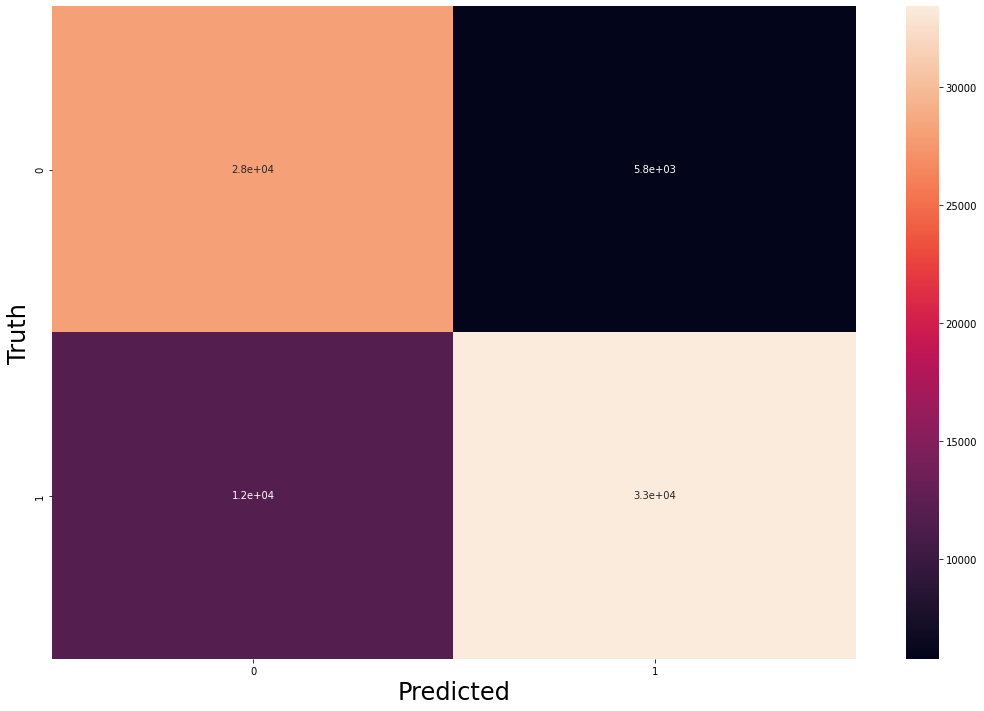

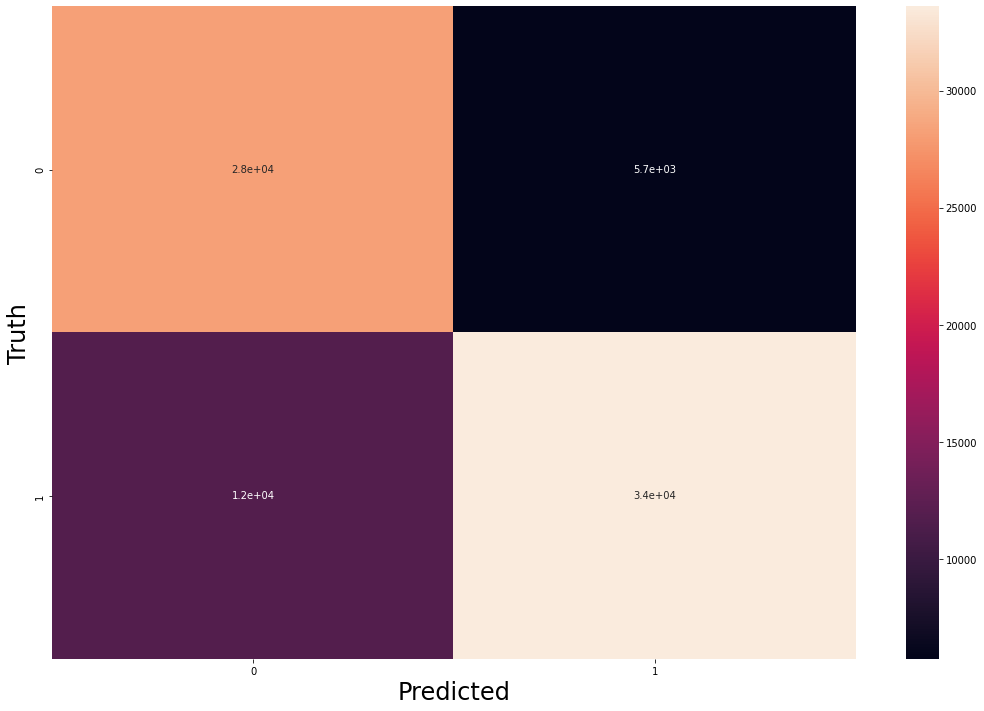

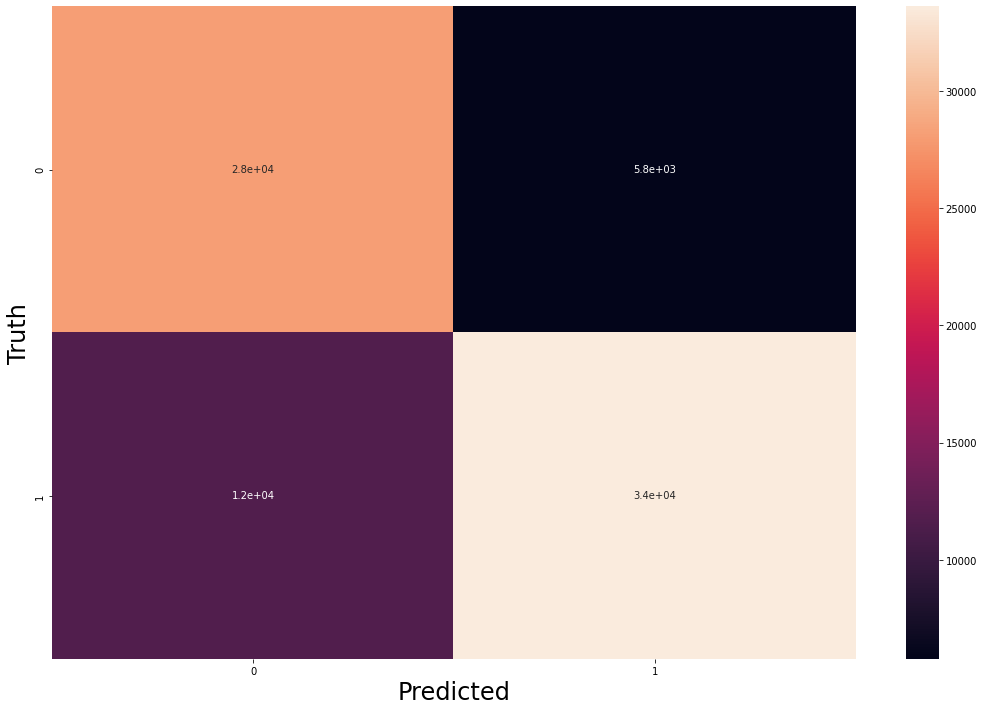

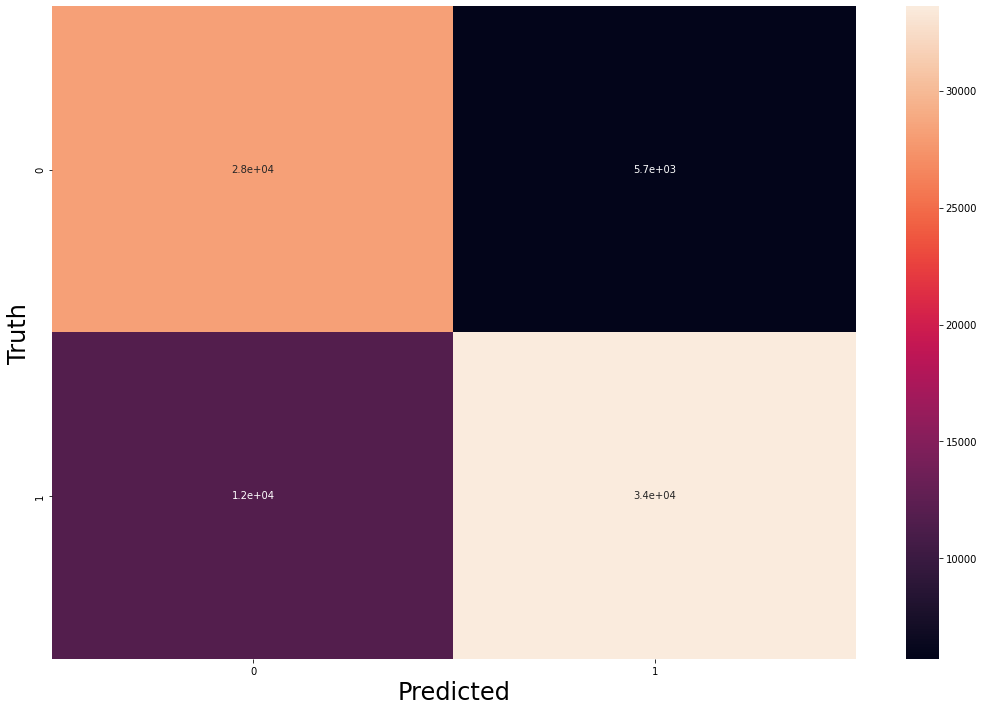

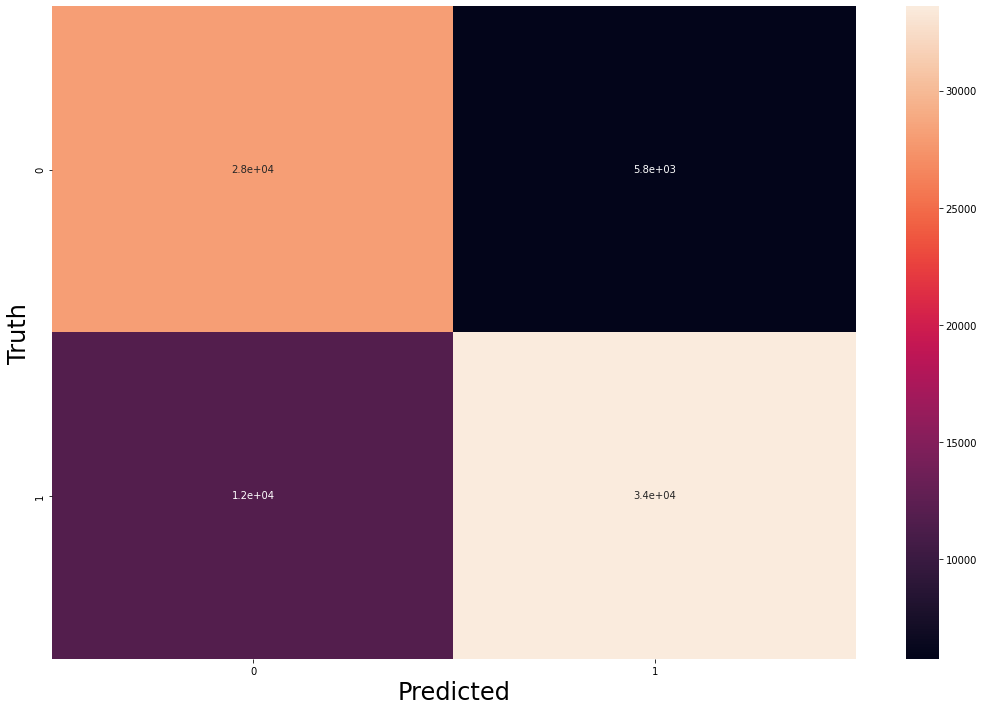

In [ ]:
n=[100,200,300,400,500]
for i in range(len(n)):
    rt_model = RandomForestClassifier(n_estimators=n[i])
    rt_model.fit(x_train,y_train)
    get_score(rt_model,x_test,y_test)
    evaluate_model(rt_model,x_test,y_test)

#### SVM

              precision    recall  f1-score   support

           0       0.62      0.90      0.73     33900
           1       0.89      0.58      0.70     45356

    accuracy                           0.72     79256
   macro avg       0.75      0.74      0.72     79256
weighted avg       0.77      0.72      0.72     79256

False positive rate FPR: 0.38338998732827806
False negative rate FNR: 0.1098209147229087
FAR: 0.2466054510255934
Accuracy: 0.7185702028868477


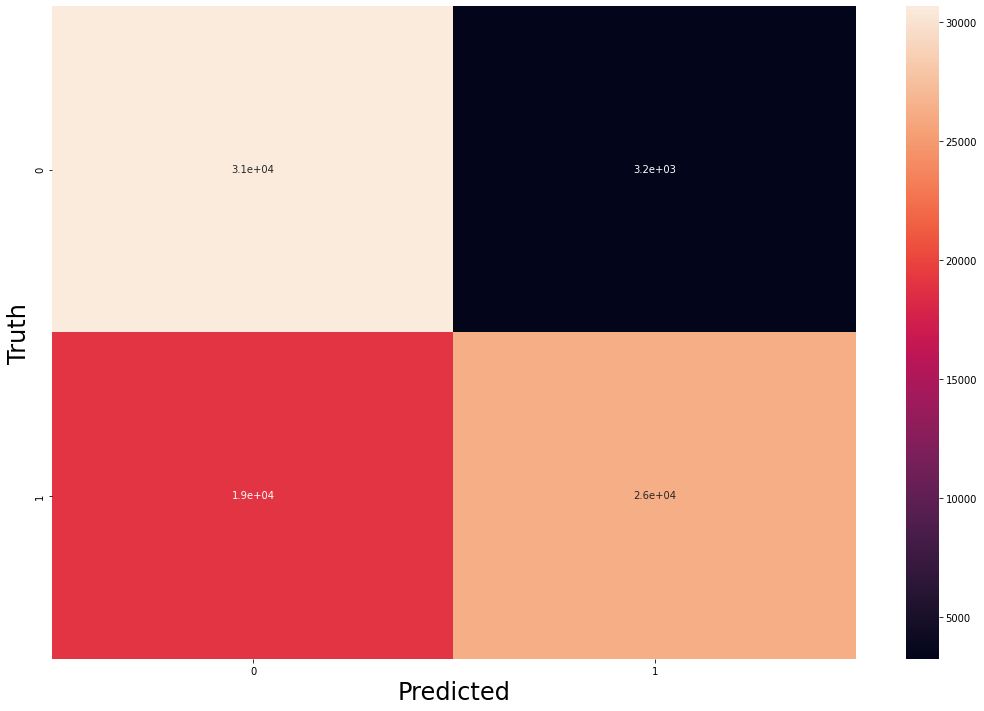

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
#get_score(svm_model,x_test,y_test)
evaluate_model(svm_model,x_test,y_test)

#### AdaBoost

AdaBoostClassifier(n_estimators=500)
score: 0.7780609669930352
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     34046
           1       0.85      0.74      0.79     45210

    accuracy                           0.78     79256
   macro avg       0.78      0.78      0.78     79256
weighted avg       0.79      0.78      0.78     79256

False positive rate FPR: 0.2950787009364415
False negative rate FNR: 0.14683919803600654
FAR: 0.22095894948622402
Accuracy: 0.7780609669930352


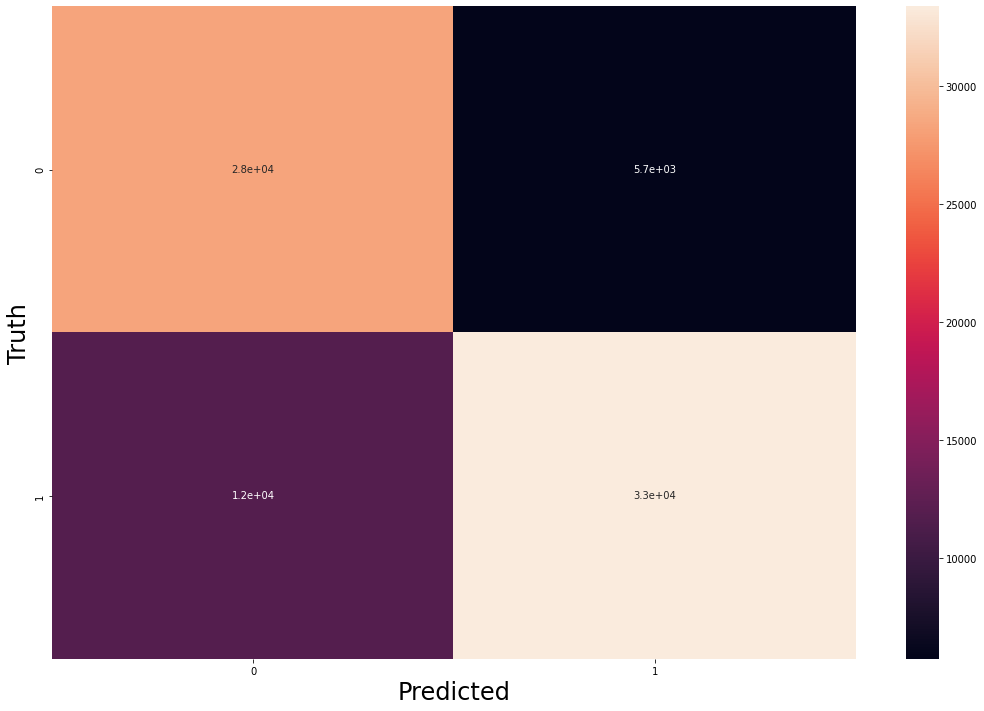

In [39]:
ab_model = AdaBoostClassifier(n_estimators=500)
ab_model.fit(x_train,y_train)
get_score(ab_model,x_test,y_test)
evaluate_model(ab_model,x_test,y_test)

#### Linear Discriminant

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
score: 0.7280205915009589
              precision    recall  f1-score   support

           0       0.62      0.94      0.75     33900
           1       0.93      0.57      0.70     45356

    accuracy                           0.73     79256
   macro avg       0.77      0.76      0.73     79256
weighted avg       0.80      0.73      0.72     79256

False positive rate FPR: 0.38031337263419174
False negative rate FNR: 0.07021092169893095
FAR: 0.22526214716656134
Accuracy: 0.7280205915009589


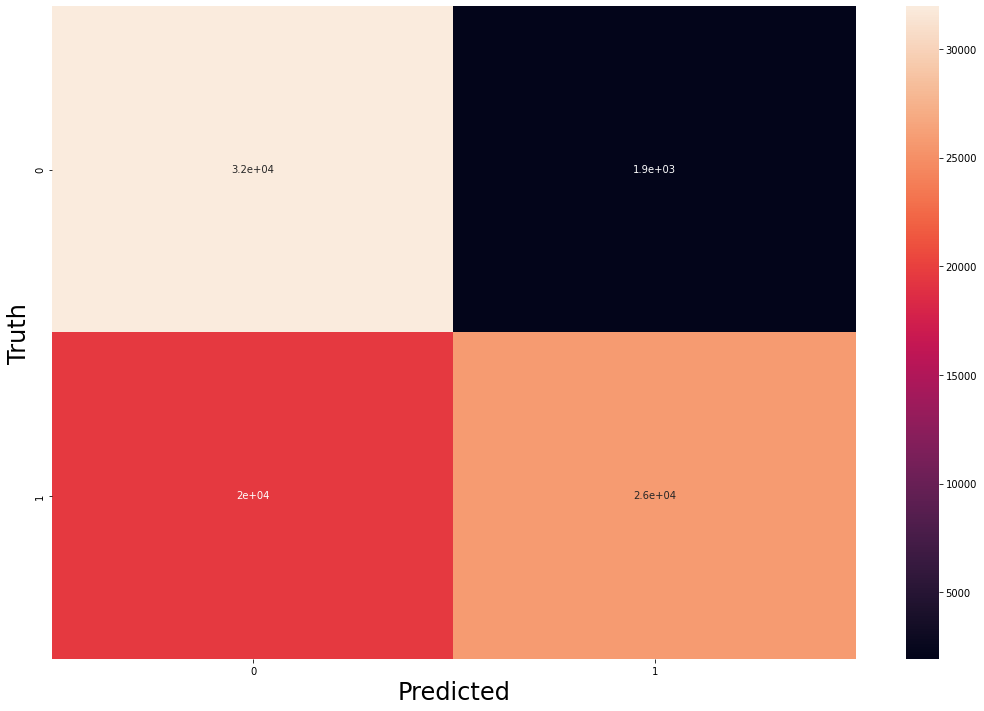

In [ ]:
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(x_train,y_train)
get_score(ld_model,x_test,y_test)
evaluate_model(ld_model,x_test,y_test)

#### KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
score: 0.7097632986777026
              precision    recall  f1-score   support

           0       0.65      0.70      0.67     33900
           1       0.76      0.72      0.74     45356

    accuracy                           0.71     79256
   macro avg       0.71      0.71      0.71     79256
weighted avg       0.71      0.71      0.71     79256

False positive rate FPR: 0.3507710005203911
False negative rate FNR: 0.2385308223183998
FAR: 0.2946509114193955
Accuracy: 0.7097632986777026
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
score: 0.7155294236398506
              precision    recall  f1-score   support

           0       0.65      0.73      0.69     339

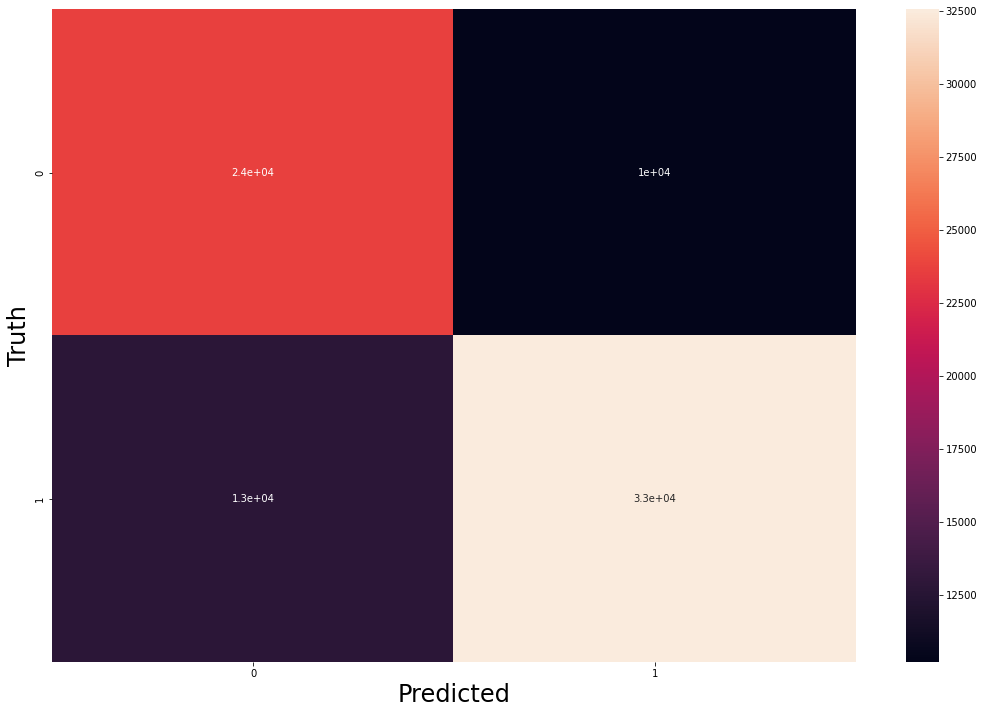

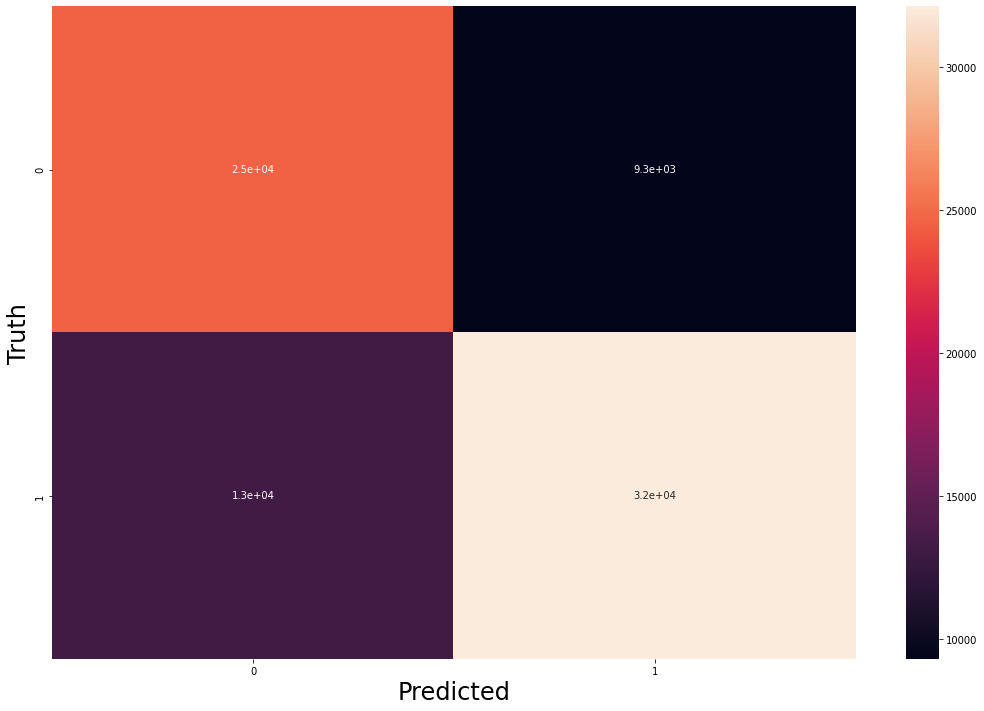

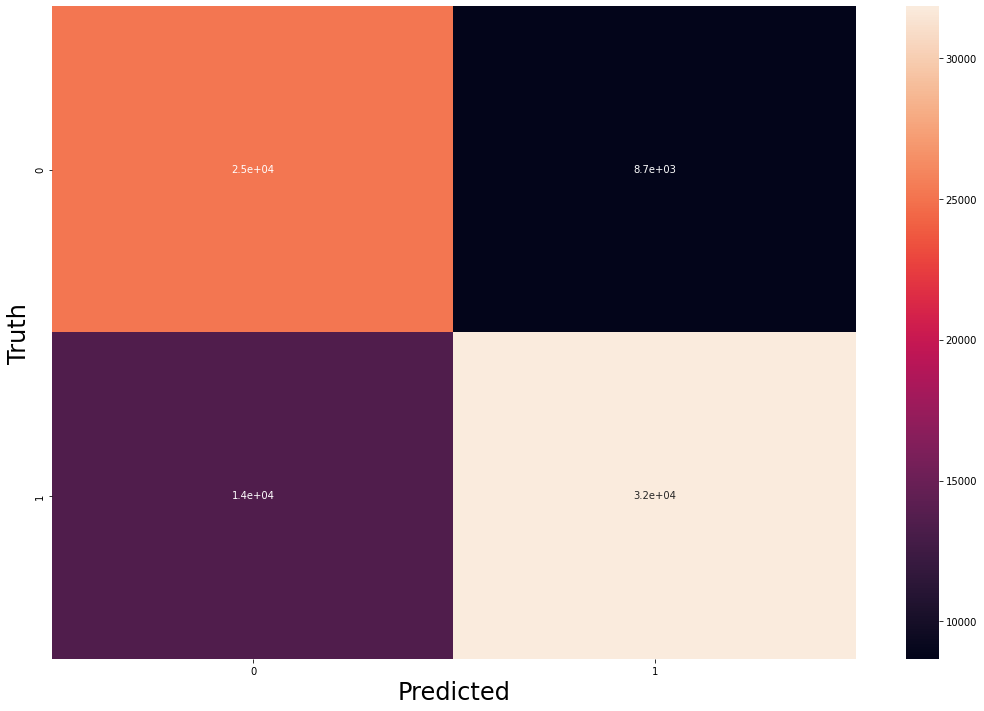

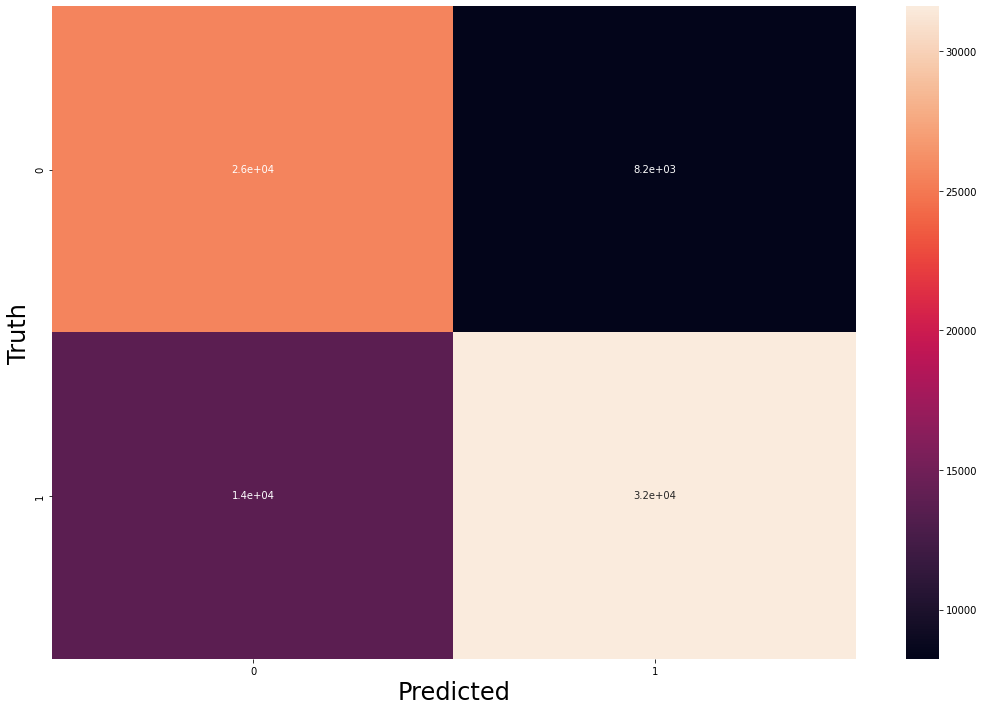

In [ ]:
n=[3,5,7,9]
for i in range(len(n)):  
  KNN_model = KNeighborsClassifier(n_neighbors=n[i])
  KNN_model.fit(x_train, y_train)
  get_score(KNN_model,x_test,y_test)
  evaluate_model(KNN_model,x_test,y_test)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score: 0.722494196023014
              precision    recall  f1-score   support

           0       0.63      0.86      0.73     34192
           1       0.85      0.62      0.72     45064

    accuracy                           0.72     79256
   macro avg       0.74      0.74      0.72     79256
weighted avg       0.76      0.72      0.72     79256

False positive rate FPR: 0.36954010695187167
False negative rate FNR: 0.1451424352427244
FAR: 0.25734127109729804
Accuracy: 0.722494196023014


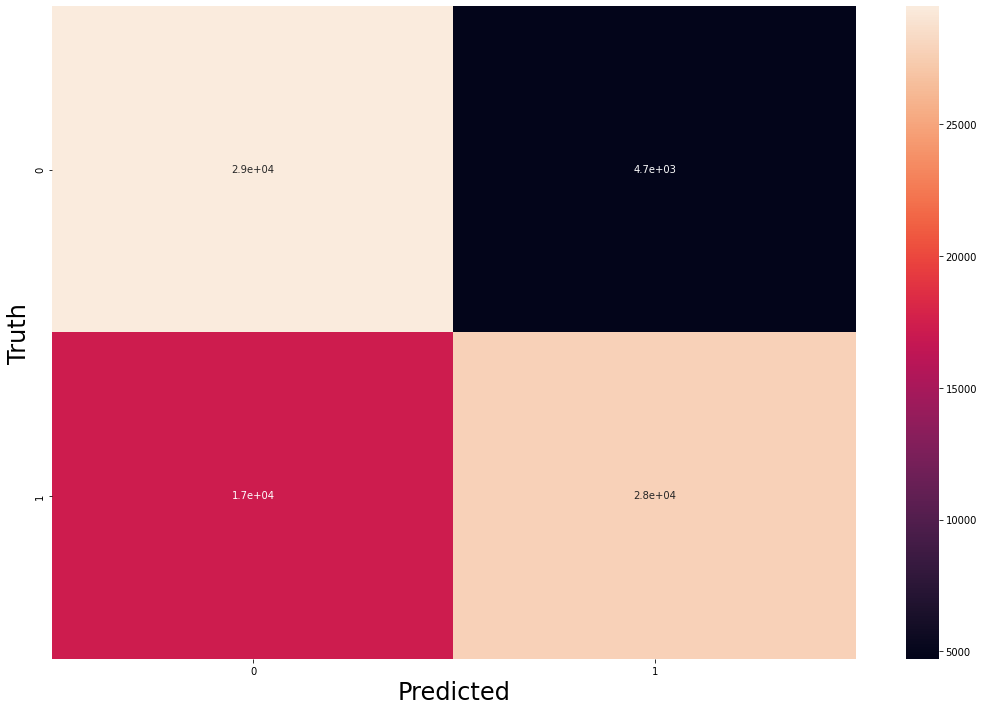

In [ ]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(x_train,y_train)
get_score(lr_model,x_test,y_test)
evaluate_model(lr_model,x_test,y_test)

#### Cross Validation

In [18]:
model = RandomForestClassifier(n_estimators=400)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.7795 (+/- 0.00)
[0.77926453 0.7788103  0.78015406 0.77784507 0.78153153]


In [19]:
model = RandomForestClassifier(n_estimators=500)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.7794 (+/- 0.00)
[0.77877245 0.77831822 0.78113822 0.77776937 0.78100159]


## Modified Evaluation

In [40]:
df_srg=pd.concat([df_trabid_normal_srg,df_trabid_attack_srg],axis='index')
df_srg = df_srg.reset_index()

In [41]:
df_srg=df_srg.sample(frac=1).reset_index(drop=True)
#df_srg = shuffle(df_srg)
df_srg.drop(columns=['index','Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp'],inplace=True)
traffic={'Normal':0,'Attack':1}
df_srg.replace({'Label':traffic},inplace=True)

In [42]:
input = df_srg.drop(columns=['Label'])
target = df_srg['Label']

x_train, x_test, y_train, y_test = train_test_split(input ,target, train_size=0.7 ,random_state=2)

#### Random Forest Classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
score: 0.8047340264459473
              precision    recall  f1-score   support

           0       0.74      0.84      0.79     34166
           1       0.87      0.77      0.82     45090

    accuracy                           0.80     79256
   macro avg       0.80      0.81      0.80     79256
weighted avg       0.81      0.80      0.81     79256

False positive rate FPR: 0.26043375717801476
False negative rate FNR: 0.13210594315245477
FAR: 0.196

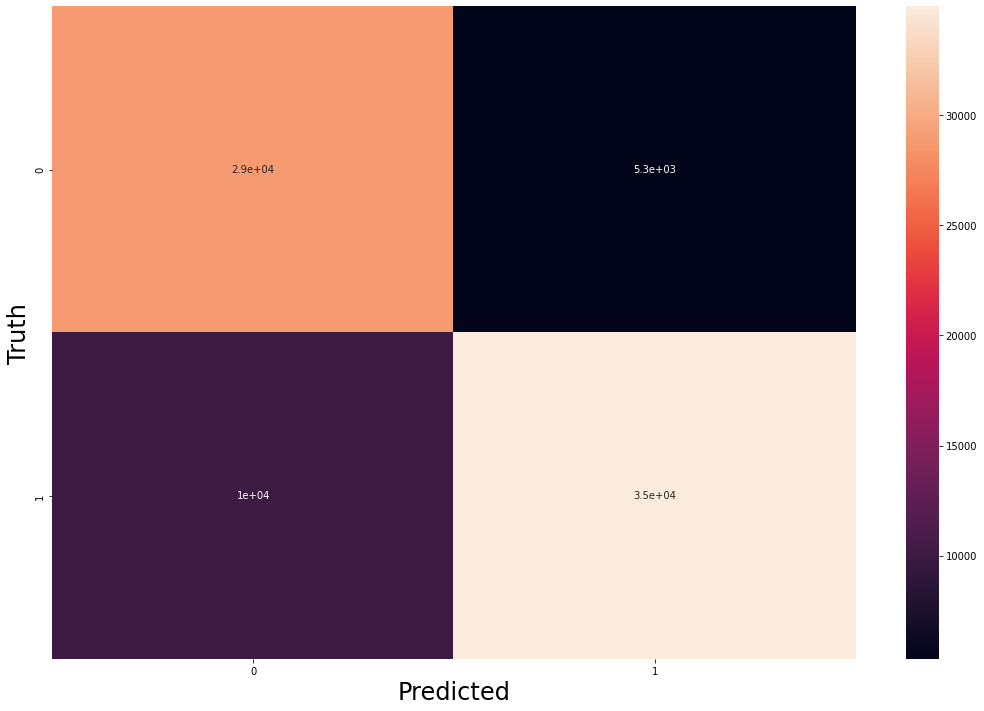

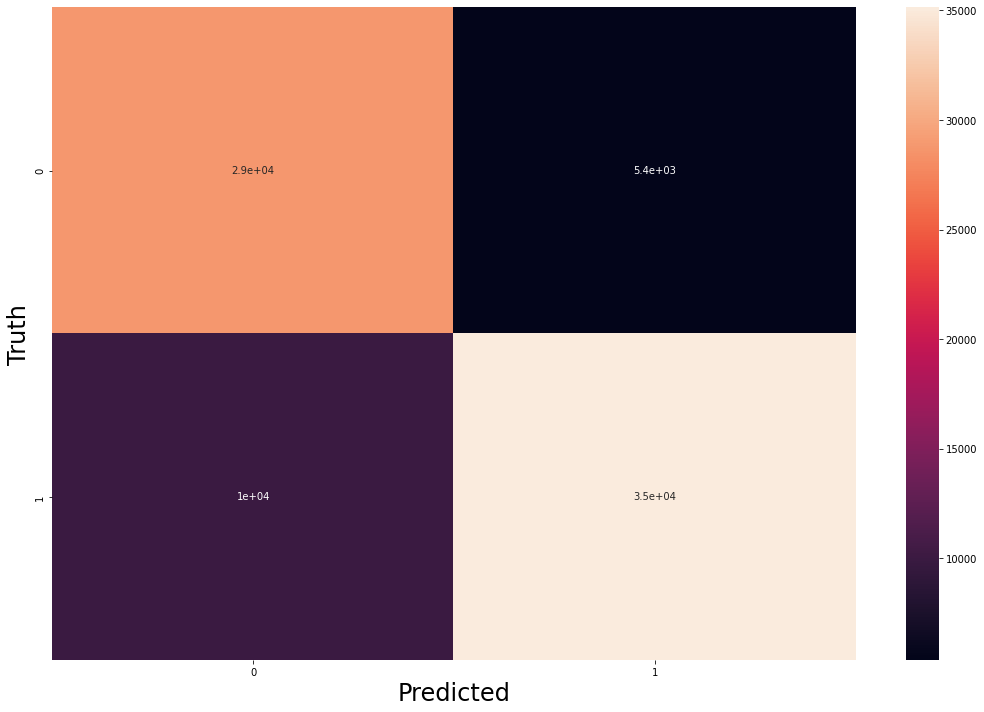

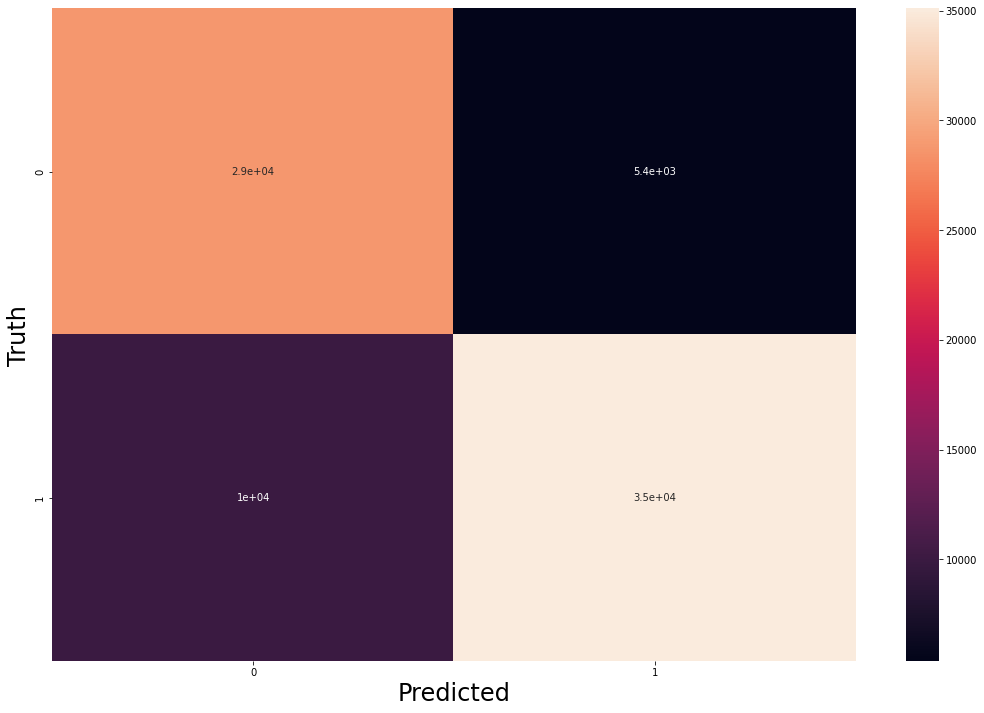

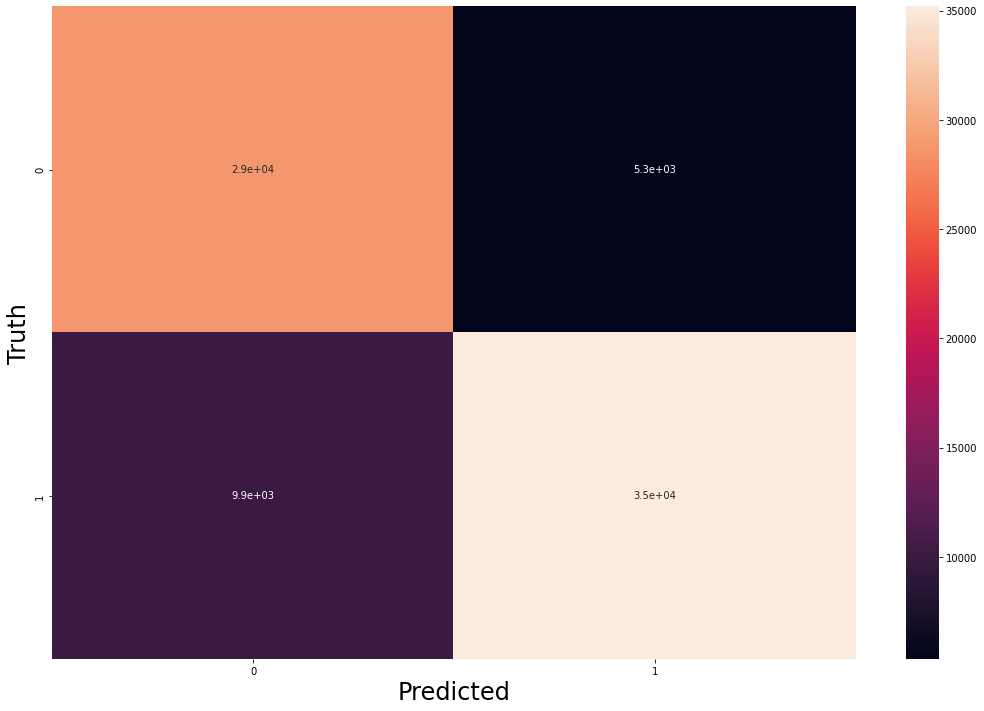

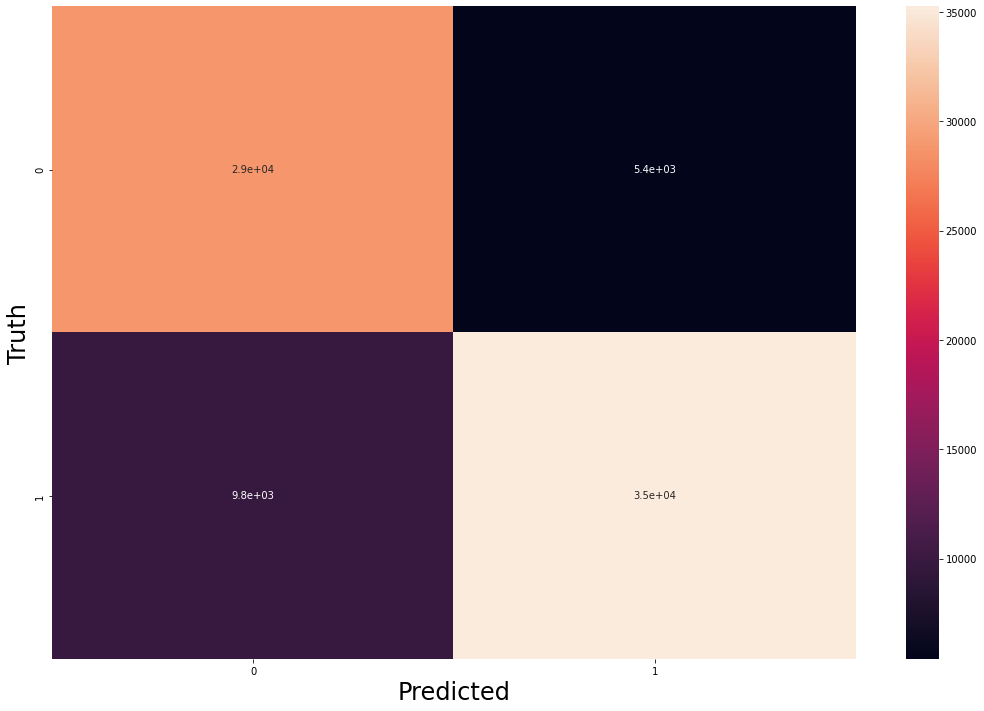

In [ ]:
n=[100,200,300,400,500]
for i in range(len(n)):
    rt_model = RandomForestClassifier(n_estimators=n[i])
    rt_model.fit(x_train,y_train)
    get_score(rt_model,x_test,y_test)
    evaluate_model(rt_model,x_test,y_test)

#### SVM

              precision    recall  f1-score   support

           0       0.62      0.91      0.74     34193
           1       0.89      0.58      0.70     45063

    accuracy                           0.72     79256
   macro avg       0.75      0.74      0.72     79256
weighted avg       0.77      0.72      0.72     79256

False positive rate FPR: 0.3811065803150236
False negative rate FNR: 0.11054468318051183
FAR: 0.24582563174776773
Accuracy: 0.7186711416170385


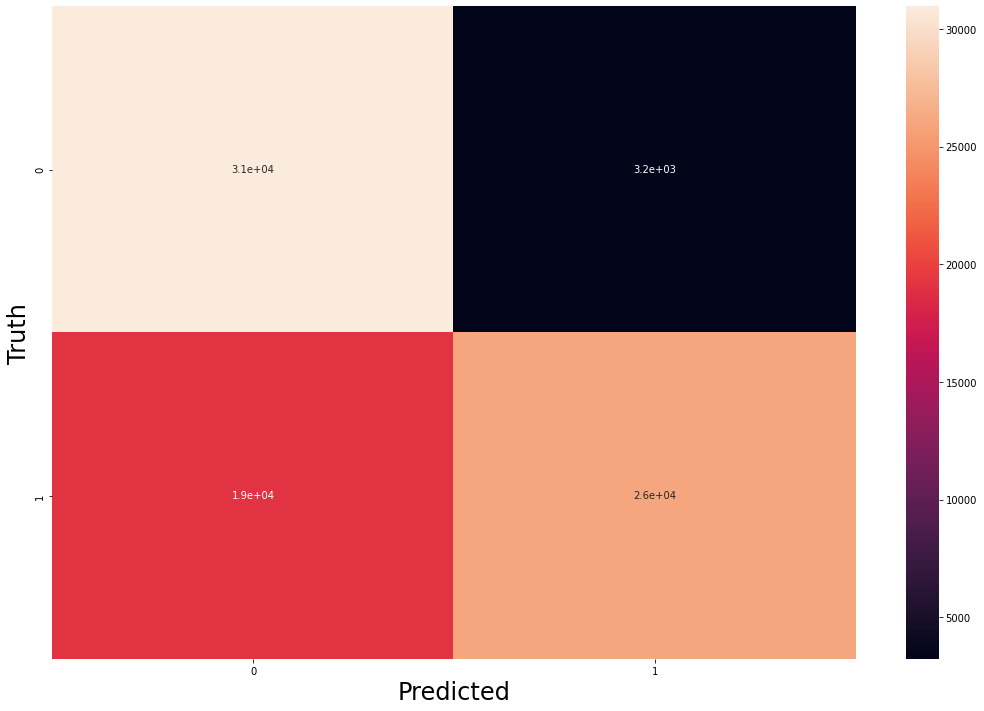

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
#get_score(svm_model,x_test,y_test)
evaluate_model(svm_model,x_test,y_test)

#### AdaBoost 

AdaBoostClassifier(n_estimators=500)
score: 0.8023367316039164
              precision    recall  f1-score   support

           0       0.74      0.84      0.78     33843
           1       0.86      0.78      0.82     45413

    accuracy                           0.80     79256
   macro avg       0.80      0.81      0.80     79256
weighted avg       0.81      0.80      0.80     79256

False positive rate FPR: 0.26354814371569063
False negative rate FNR: 0.13562311668585708
FAR: 0.19958563020077386
Accuracy: 0.8023367316039164


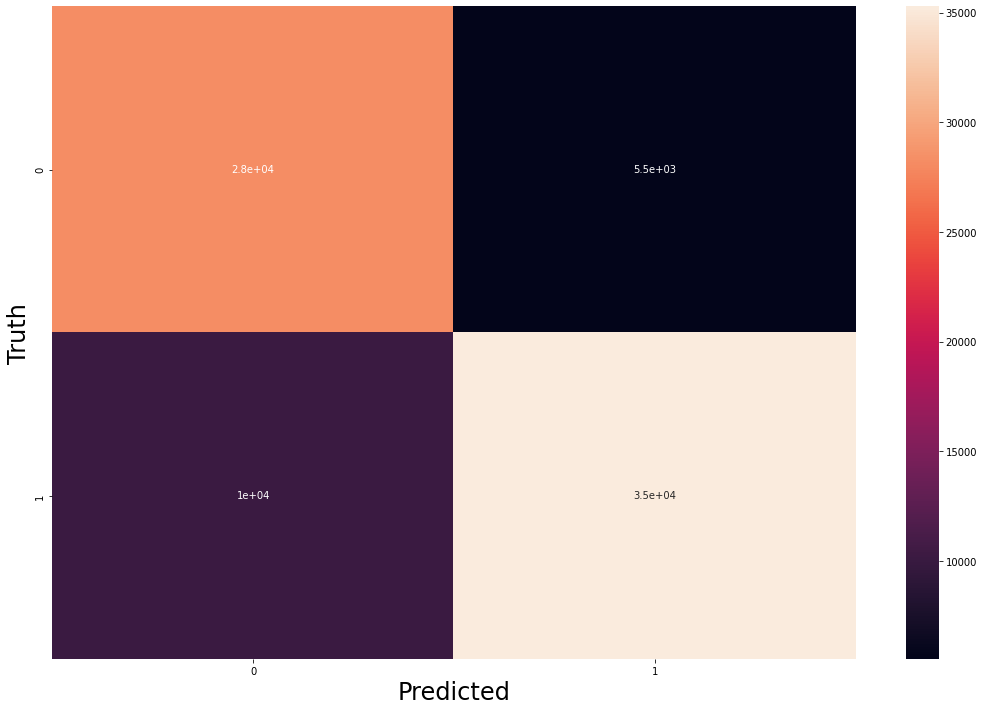

In [43]:
ab_model = AdaBoostClassifier(n_estimators=500)
ab_model.fit(x_train,y_train)
get_score(ab_model,x_test,y_test)
evaluate_model(ab_model,x_test,y_test)

#### Linear Discriminant

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
score: 0.7360199858685778
              precision    recall  f1-score   support

           0       0.63      0.91      0.75     34193
           1       0.90      0.60      0.72     45063

    accuracy                           0.74     79256
   macro avg       0.77      0.76      0.74     79256
weighted avg       0.79      0.74      0.73     79256

False positive rate FPR: 0.3654029493498854
False negative rate FNR: 0.09707247054110893
FAR: 0.23123770994549714
Accuracy: 0.7360199858685778


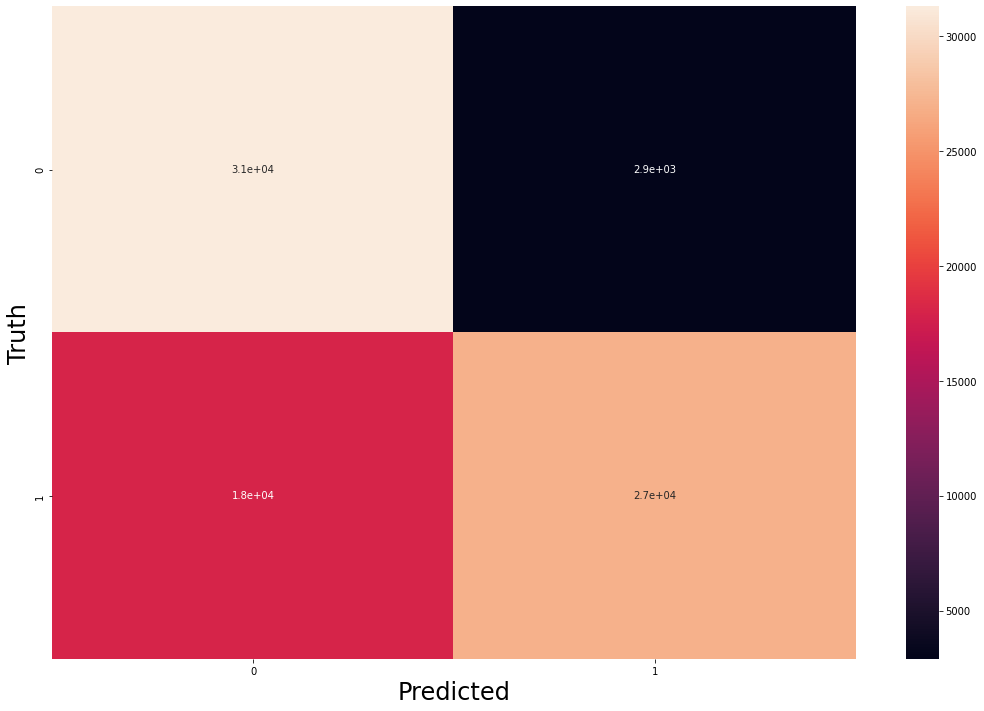

In [ ]:
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(x_train,y_train)
get_score(ld_model,x_test,y_test)
evaluate_model(ld_model,x_test,y_test)

#### KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
score: 0.7093090743918441
              precision    recall  f1-score   support

           0       0.65      0.70      0.67     34193
           1       0.76      0.72      0.74     45063

    accuracy                           0.71     79256
   macro avg       0.71      0.71      0.71     79256
weighted avg       0.71      0.71      0.71     79256

False positive rate FPR: 0.3469454964597398
False negative rate FNR: 0.24281844084263626
FAR: 0.29488196865118804
Accuracy: 0.7093090743918441
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
score: 0.7134223276471182
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     3

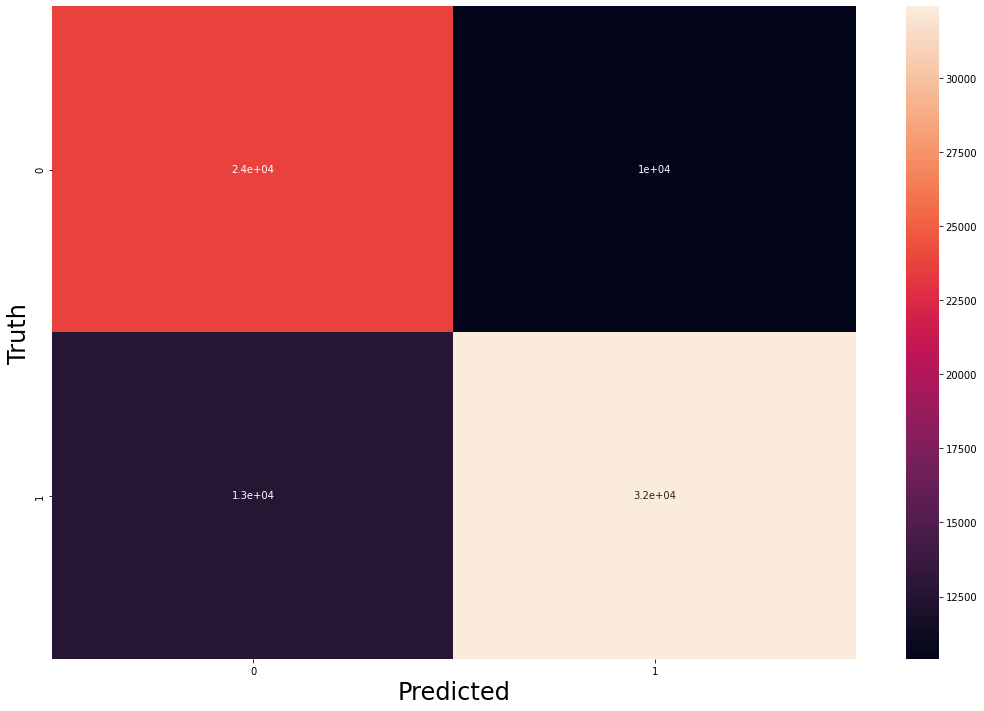

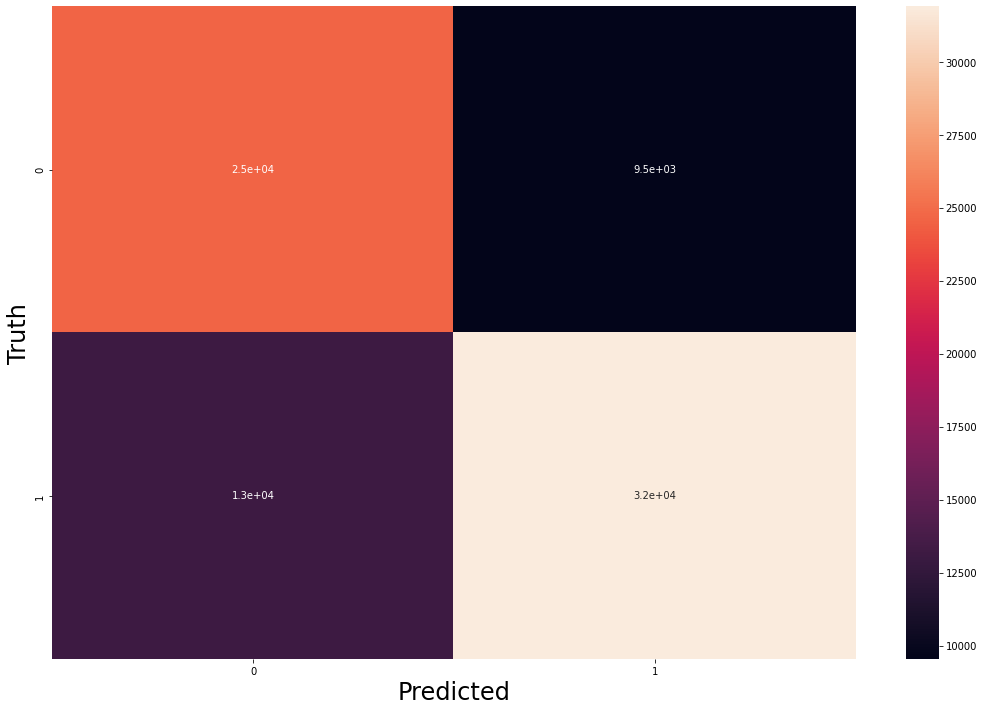

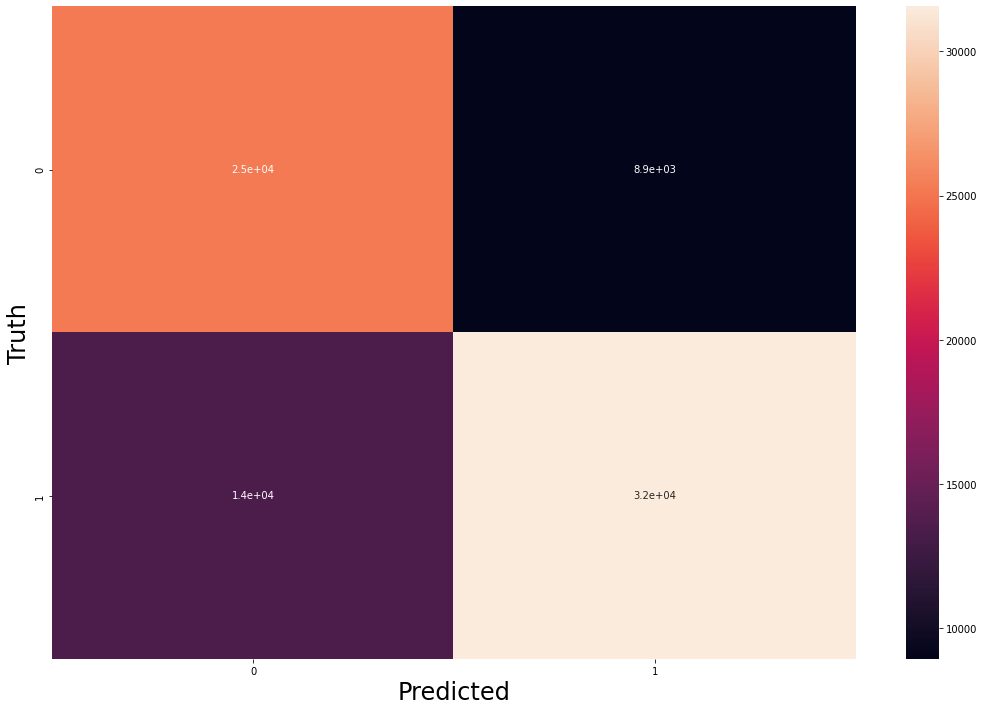

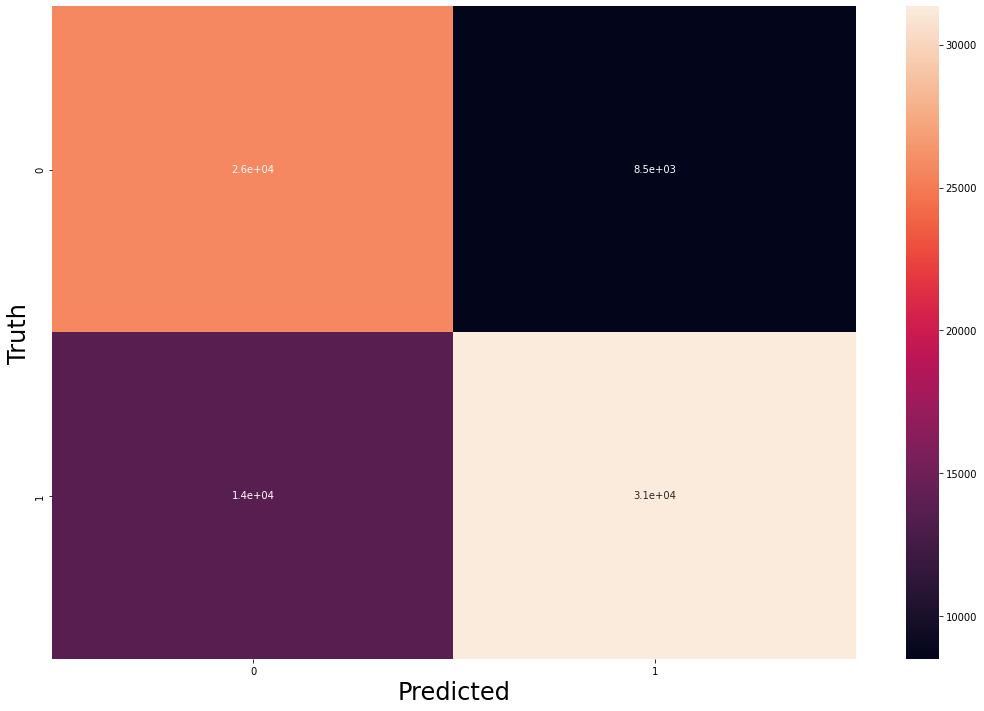

In [ ]:
n=[3,5,7,9]
for i in range(len(n)):  
  KNN_model = KNeighborsClassifier(n_neighbors=n[i])
  KNN_model.fit(x_train, y_train)
  get_score(KNN_model,x_test,y_test)
  evaluate_model(KNN_model,x_test,y_test)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score: 0.7211062884828909
              precision    recall  f1-score   support

           0       0.63      0.85      0.72     34193
           1       0.85      0.62      0.72     45063

    accuracy                           0.72     79256
   macro avg       0.74      0.74      0.72     79256
weighted avg       0.75      0.72      0.72     79256

False positive rate FPR: 0.36864066065413453
False negative rate FNR: 0.15465840377846635
FAR: 0.26164953221630044
Accuracy: 0.7211062884828909


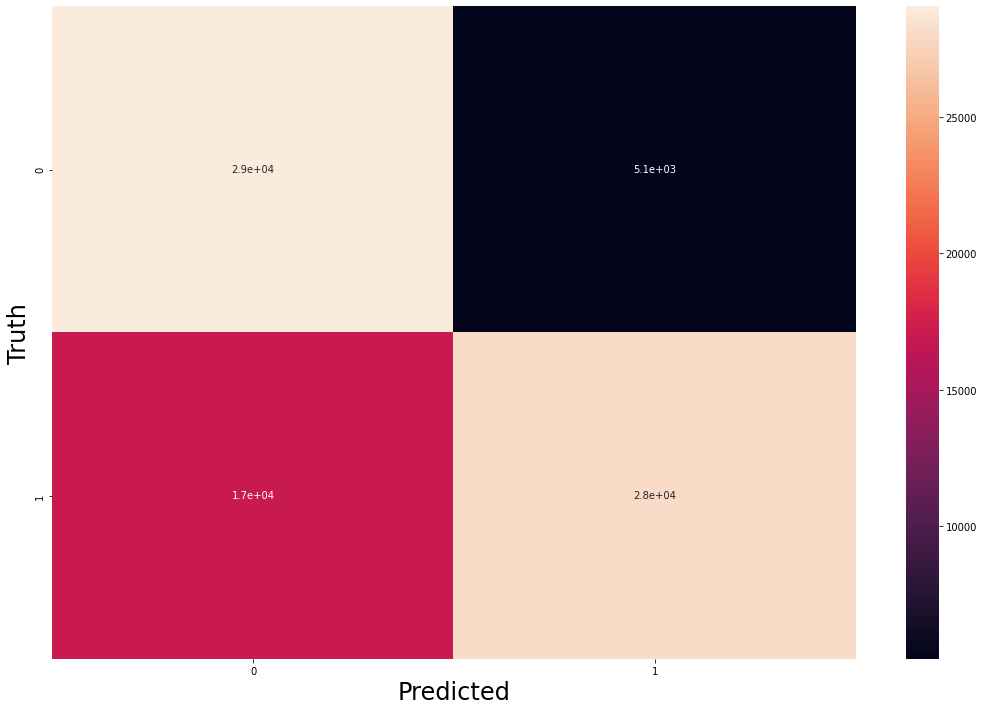

In [ ]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(x_train,y_train)
get_score(lr_model,x_test,y_test)
evaluate_model(lr_model,x_test,y_test)

#### Cross Validation

In [23]:
model = RandomForestClassifier(n_estimators=400)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.8086 (+/- 0.00)
[0.80994379 0.80943278 0.8093003  0.80604501 0.80848285]


In [24]:
model = RandomForestClassifier(n_estimators=500)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.8090 (+/- 0.00)
[0.81092795 0.8100952  0.80899748 0.80765373 0.80732834]


## Retrieve Model

In [ ]:
"""import pickle

filename = 'model.sav'
pickle.dump(model, open(filename,'wb'))


loaded_model = pickle.load(open(filename,'rb'))"""